In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import seaborn as sns

from pandas import DataFrame

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [231]:
data = pd.read_csv('data/Kobe.csv')

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.

In [232]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [234]:
#напрямую установим индекс и переведем явно категориальные столбцы в соответствующий тип

data.set_index('shot_id', inplace=True)
data["action_type"] = data["action_type"].astype('object')
data["combined_shot_type"] = data["combined_shot_type"].astype('category')
data["game_event_id"] = data["game_event_id"].astype('category')
data["game_id"] = data["game_id"].astype('category')
data["period"] = data["period"].astype('object')
data["season"] = data["season"].astype('category')
data["shot_type"] = data["shot_type"].astype('category')
data["team_id"] = data["team_id"].astype('category')

In [235]:
#посмотрим на статистики числовых столбцов

data.describe(include=['number'])

,lat,loc_x,loc_y,lon,minutes_remaining,playoffs,seconds_remaining,shot_distance,shot_made_flag
count,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000
mean,33.953192,7.110499,91.107535,-118.262690,4.885624,0.146562,28.365085,13.437437,0.446161
std,0.087791,110.124578,87.791361,0.110125,3.449897,0.353674,17.478949,9.374189,0.497103
min,33.253300,-250.000000,-44.000000,-118.519800,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.884300,-68.000000,4.000000,-118.337800,2.000000,0.000000,13.000000,5.000000,0.000000
50%,33.970300,0.000000,74.000000,-118.269800,5.000000,0.000000,28.000000,15.000000,0.000000
75%,34.040300,95.000000,160.000000,-118.174800,8.000000,0.000000,43.000000,21.000000,1.000000
max,34.088300,248.000000,791.000000,-118.021800,11.000000,1.000000,59.000000,79.000000,1.000000


In [236]:
#небольшое описание объектных и категориальных переменных

data.describe(include=['object', 'category'])

,action_type,combined_shot_type,game_event_id,game_id,period,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
count,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697
unique,57,6,620,1559,7,20,2,6,7,5,1,1,1559,74,33
top,Jump Shot,Jump Shot,2,21501228,3,2005-06,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,1610612747,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,18880,23485,132,50,8296,2318,24271,13455,12625,9398,30697,30697,50,1020,1978


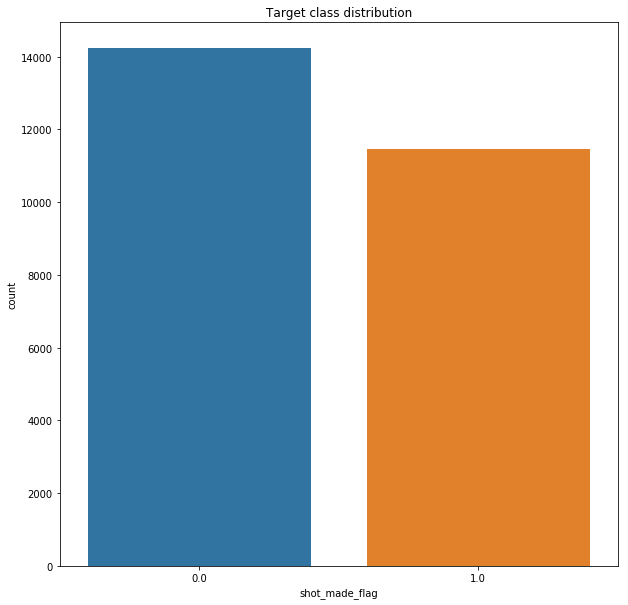

In [237]:
#визуализация того, как выглядит целевая переменная

ax = plt.axes()
sns.countplot(x='shot_made_flag', data=data, ax=ax);
ax.set_title('Target class distribution')
plt.show()

#не сильно разбалансровано

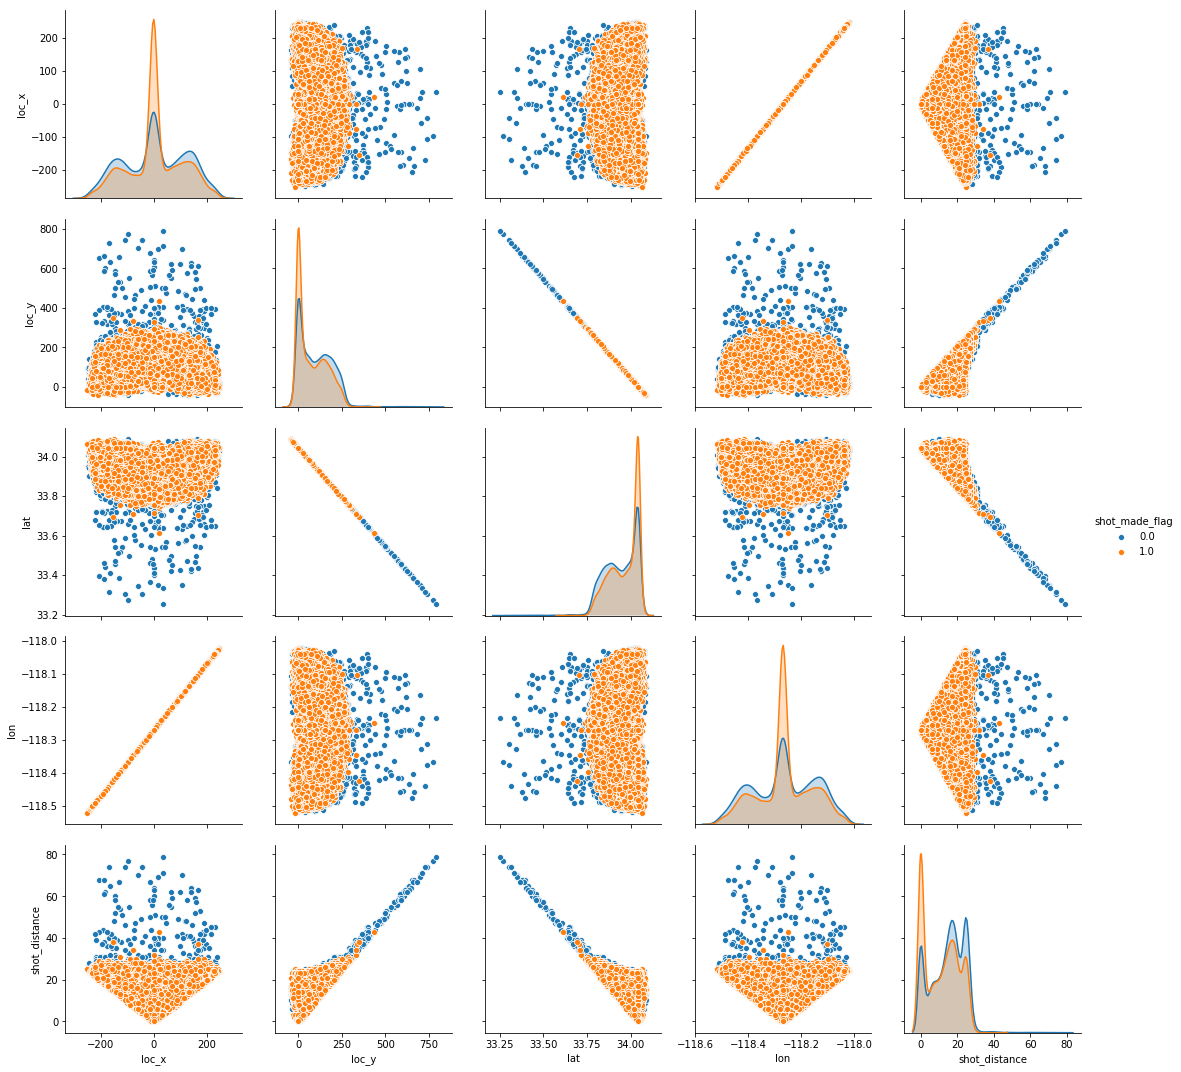

In [238]:
#посмотрим корреляции
sns.pairplot(data, vars=['loc_x', 'loc_y', 'lat', 'lon', 'shot_distance'], hue='shot_made_flag', height=3)
plt.show()

#видим четкую корреляцию между: 1. долготой и координатой по x, 2. широтой и координатой по y

In [239]:
#скопируем данные в отдельный датафрейм и избавимся от лишних столбцов

data_cl = data.copy()

data_cl.drop('team_id', axis=1, inplace=True) # всегда одинаковый
data_cl.drop('lat', axis=1, inplace=True) # корреляция с loc_x
data_cl.drop('lon', axis=1, inplace=True) # корреляция с loc_y
data_cl.drop('game_id', axis=1, inplace=True) # не имеет смысла для обучения
data_cl.drop('game_event_id', axis=1, inplace=True) # не имеет смысла для обучения
data_cl.drop('team_name', axis=1, inplace=True) # всегда одинаковый

In [240]:
#введем дополнительные фичи

# кол-во секунд, оставшееся до конца периода
data_cl['seconds_from_period_end'] = 60 * data_cl['minutes_remaining'] + data_cl['seconds_remaining']
# бросок в последние 5 секунд да/нет
data_cl['last_5_sec_in_period'] = data_cl['seconds_from_period_end'] < 5

data_cl.drop('minutes_remaining', axis=1, inplace=True)
data_cl.drop('seconds_remaining', axis=1, inplace=True)
data_cl.drop('seconds_from_period_end', axis=1, inplace=True)

# домашняя игра да/нет
data_cl['home_play'] = data_cl['matchup'].str.contains('vs').astype('int')
data_cl.drop('matchup', axis=1, inplace=True)

# год и месяц игры
data_cl['game_date'] = pd.to_datetime(data_cl['game_date'])
data_cl['game_year'] = data_cl['game_date'].dt.year
data_cl['game_month'] = data_cl['game_date'].dt.month
data_cl.drop('game_date', axis=1, inplace=True)

# позицию броска сегментируем, разложим на 25 бинов
#data_cl['loc_x'] = pd.cut(data_cl['loc_x'], 25)
#data_cl['loc_y'] = pd.cut(data_cl['loc_y'], 25)

# 20 наименее значимых типов броска заменим на 'Other'
rare_action_types = data_cl['action_type'].value_counts().sort_values().index.values[:20]
data_cl.loc[data_cl['action_type'].isin(rare_action_types), 'action_type'] = 'Other'

In [241]:
data_cl.head()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,last_5_sec_in_period,home_play,game_year,game_month
shot_id,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,167,72,1,0,2000-01,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,POR,False,0,2000,10
2,Jump Shot,Jump Shot,-157,0,1,0,2000-01,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,False,0,2000,10
3,Jump Shot,Jump Shot,-101,135,1,0,2000-01,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,False,0,2000,10
4,Jump Shot,Jump Shot,138,175,1,0,2000-01,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,False,0,2000,10
5,Driving Dunk Shot,Dunk,0,0,2,0,2000-01,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,False,0,2000,10


In [242]:
#преобразуем категориальные переменные в бинарные признаки

categorial_cols = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_year',
    'game_month', 'opponent']

#categorial_cols = [
#    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
#    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_year',
#    'game_month', 'opponent', 'loc_x', 'loc_y']

for cc in categorial_cols:
    dummies = pd.get_dummies(data_cl[cc])
    dummies = dummies.add_prefix("{}_".format(cc))
    dummies.rename(columns=lambda x: x.replace(' ','_'), inplace=True)
    data_cl.drop(cc, axis=1, inplace=True)
    data_cl = data_cl.join(dummies)

In [243]:
data_cl.head()

,loc_x,loc_y,playoffs,shot_distance,shot_made_flag,last_5_sec_in_period,home_play,action_type_Alley_Oop_Dunk_Shot,action_type_Alley_Oop_Layup_shot,action_type_Driving_Dunk_Shot,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
shot_id,,,,,,,,,,,,,,,,,,,,,
1,167,72,0,18,NaN,False,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-157,0,0,15,0.0,False,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,-101,135,0,16,1.0,False,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,138,175,0,22,0.0,False,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1.0,False,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [244]:
data_cl.shape

(30697, 161)

In [245]:
unknown_mask = data['shot_made_flag'].isnull()

# выделим обучающую выборку
X = data_cl[~unknown_mask]

In [246]:
ids_test = np.random.choice(X.index, size=int(30697*.8), replace=False)

In [247]:
X_train = X[X.index.isin(ids_test)].copy()
print("Train dataset: ", len(X_train))

X_test = X[~X.index.isin(ids_test)].copy()
print("Test dataset: ", len(X_test))

Train dataset:  24557
Test dataset:  1140


In [248]:
y_train = X_train['shot_made_flag'].copy()
y_test = X_test['shot_made_flag'].copy()

X_train.drop('shot_made_flag', axis=1, inplace=True)
X_test.drop('shot_made_flag', axis=1, inplace=True)

In [249]:
y_train.shape

(24557,)

In [250]:
y_test.shape

(1140,)

3. Обучить линейную модель, Lasso, Ridge на тех же признаках - построить сравнительную таблицу коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. Посчитать RSS

In [251]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [252]:
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.460294868233381

In [253]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [254]:
def get_formula(_cols):
    return 'shot_made_flag ~ ' + " + ".join(map(lambda x: "Q('" + x + "')", _cols))

In [255]:
train_df = pd.merge(X_train, y_train, left_index=True, right_index=True)
test_df = pd.merge(X_test, y_test, left_index=True, right_index=True)

In [ ]:
#итерация 1

In [258]:
lm = smf.ols(get_formula(train_df.columns.drop('shot_made_flag')), train_df).fit()

In [259]:
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.45667017113487884
R^2: 0.15573148967936468


In [340]:
lm_res = lm.summary()

In [433]:
def cols_to_drop(res_table, limit):
    #в таблице summary находим столбцы со значением P>|t| больше limit и возвращаем их в виде списка
    rows = []
    for i, row in enumerate(res_table):
        if (i < 2):
            continue
        rows.append([row[0].data,float(row[4].data)])
        
    df = pd.DataFrame(rows, columns=['name','value'])
    return [cname[3:-2] for cname in df['name'][i1_data['value']>limit]]            

In [435]:
c_d_1 = cols_to_drop(lm_res.tables[1],0.95)
c_d_1

['action_type_Alley_Oop_Layup_shot',
 'action_type_Jump_Hook_Shot',
 'action_type_Running_Layup_Shot',
 'action_type_Turnaround_Bank_shot',
 'period_6',
 'season_2006-07',
 'shot_zone_range_Less_Than_8_ft.',
 'game_year_1996',
 'game_year_2012']

In [436]:
train_df.drop(c_d_1, axis=1, inplace=True)

In [414]:
#итерация 2

In [437]:
lm = smf.ols(get_formula(train_df.columns.drop('shot_made_flag')), train_df).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.4566703433849236
R^2: 0.15573085278505727


In [ ]:
#оценки поменялись незначительно

In [440]:
lm_res = lm.summary()
c_d_2 = cols_to_drop(lm_res.tables[1],0.9)
c_d_2

['action_type_Driving_Dunk_Shot',
 'action_type_Layup_Shot',
 'action_type_Tip_Shot',
 'combined_shot_type_Dunk',
 'season_1999-00',
 'season_2012-13',
 'game_year_2003',
 'game_year_2004',
 'game_month_5',
 'opponent_ORL',
 'opponent_VAN']

In [441]:
train_df.drop(c_d_2, axis=1, inplace=True)

In [ ]:
# итерация 3

In [442]:
lm = smf.ols(get_formula(train_df.columns.drop('shot_made_flag')), train_df).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.4572812340225574
R^2: 0.15347057427051203


In [ ]:
#попробуем сделать кардинальный шаг

In [445]:
lm_res = lm.summary()
c_d_3 = cols_to_drop(lm_res.tables[1],0.4)
c_d_3

['action_type_Driving_Finger_Roll_Layup_Shot',
 'action_type_Driving_Slam_Dunk_Shot',
 'action_type_Dunk_Shot',
 'action_type_Fadeaway_Jump_Shot',
 'action_type_Hook_Shot',
 'action_type_Jump_Bank_Shot',
 'action_type_Other',
 'action_type_Pullup_Jump_shot',
 'action_type_Reverse_Slam_Dunk_Shot',
 'action_type_Running_Bank_shot',
 'action_type_Running_Hook_Shot',
 'action_type_Slam_Dunk_Shot',
 'action_type_Step_Back_Jump_shot',
 'action_type_Turnaround_Jump_Shot',
 'combined_shot_type_Bank_Shot',
 'combined_shot_type_Layup',
 'combined_shot_type_Tip_Shot',
 'period_4',
 'season_2002-03',
 'season_2003-04',
 'season_2004-05',
 'season_2005-06',
 'season_2008-09',
 'season_2009-10',
 'season_2010-11',
 'season_2015-16',
 'shot_type_2PT_Field_Goal',
 'shot_type_3PT_Field_Goal',
 'shot_zone_area_Back_Court(BC)',
 'shot_zone_area_Center(C)',
 'shot_zone_area_Left_Side_Center(LC)',
 'shot_zone_area_Left_Side(L)',
 'shot_zone_area_Right_Side_Center(RC)',
 'shot_zone_area_Right_Side(R)',
 'sh

In [446]:
train_df.drop(c_d_3, axis=1, inplace=True)

In [447]:
# итерация 4

lm = smf.ols(get_formula(train_df.columns.drop('shot_made_flag')), train_df).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.467650239475416
R^2: 0.1146446358437554


In [ ]:
#видим, что порезали слишком сильно и RMSE увеличился, а R^2 уменьшился

In [448]:
#вернемся

train_df = pd.merge(X_train, y_train, left_index=True, right_index=True)

lm = smf.ols(get_formula(train_df.columns.drop('shot_made_flag')), train_df).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.45667017113487884
R^2: 0.15573148967936468


In [449]:
#порежем от 0.8

lm_res = lm.summary()
c_d_4 = cols_to_drop(lm_res.tables[1],0.8)
c_d_4

['action_type_Alley_Oop_Layup_shot',
 'action_type_Dunk_Shot',
 'action_type_Floating_Jump_shot',
 'action_type_Jump_Bank_Shot',
 'action_type_Jump_Hook_Shot',
 'action_type_Putback_Layup_Shot',
 'action_type_Running_Jump_Shot',
 'action_type_Running_Layup_Shot',
 'action_type_Turnaround_Bank_shot',
 'period_6',
 'season_2005-06',
 'season_2006-07',
 'season_2007-08',
 'season_2011-12',
 'shot_zone_area_Left_Side(L)',
 'shot_zone_basic_Backcourt',
 'shot_zone_range_Less_Than_8_ft.',
 'game_year_1996',
 'game_year_2003',
 'game_year_2012',
 'game_year_2015',
 'opponent_ATL',
 'opponent_CLE',
 'opponent_MEM',
 'opponent_MIA',
 'opponent_ORL']

In [450]:
train_df.drop(c_d_4, axis=1, inplace=True)

lm = smf.ols(get_formula(train_df.columns.drop('shot_made_flag')), train_df).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.4566991179821356
R^2: 0.1556244553788627


In [ ]:
#ну норм

In [451]:
train_df.drop('shot_made_flag', axis=1, inplace=True)

linreg = LinearRegression(normalize=True)
linreg.fit(train_df, y_train)
y_pred = linreg.predict(train_df)

In [456]:
rss = sum((y_pred - y_train) ** 2)
rss

5121.953972113784

In [459]:
linreg.intercept_

114482512398.3843

In [453]:
linreg.coef_

array([-7.54704906e-05, -1.20754411e-04, -2.15762344e-02,  3.25377888e-03,
       -1.52607331e-01,  6.73651005e-03,  1.55935563e-01,  1.99997842e-01,
        1.89010191e-01,  1.41993081e-01, -2.99781721e-01,  3.57808988e-02,
        7.11605142e-02,  2.12839969e-01,  1.59085586e-01, -1.96508059e-01,
        1.23742233e-01, -2.37569948e-01,  1.30728852e-01, -3.50712575e-01,
       -4.61348653e-01, -3.26235588e-01, -8.70618558e-02, -2.84516266e-02,
        1.25240512e-01, -7.70044557e-02,  2.42795121e-01,  5.06911121e-02,
        1.17752512e-01,  1.52840478e-01,  1.98420365e-01, -1.26371541e-01,
        2.99188680e-01, -1.60686257e-01, -1.68260136e-01, -3.48066453e+10,
       -3.48066453e+10, -3.48066453e+10, -3.48066453e+10, -3.48066453e+10,
       -3.48066453e+10,  5.00170696e-02,  3.88415362e-02,  3.73818004e-02,
        5.73486558e-03,  1.26734746e-02,  4.35091204e-02,  1.71639206e-02,
       -1.53047488e-02,  1.69659447e-02,  1.47232990e-03,  2.22630184e-02,
        4.12048838e-02,  

In [457]:
from sklearn.linear_model import Ridge

In [458]:
ridgereg = Ridge(alpha=1e-4, normalize=True)
ridgereg.fit(train_df, y_train)
y_pred = ridgereg.predict(train_df)

In [460]:
rss = sum((y_pred - y_train) ** 2)
rss

5121.954312438953

In [461]:
ridgereg.intercept_

0.5558672319337554

In [462]:
ridgereg.coef_

array([-7.48404628e-05, -1.19487125e-04, -2.15356172e-02,  3.24174522e-03,
       -1.52609472e-01,  6.73770783e-03,  1.55780232e-01,  1.99957838e-01,
        1.89227572e-01,  1.42249125e-01, -2.99220374e-01,  3.61166398e-02,
        7.14030497e-02,  2.12614804e-01,  1.59267877e-01, -1.96174892e-01,
        1.24101630e-01, -2.37153895e-01,  1.30426206e-01, -3.50564443e-01,
       -4.61003396e-01, -3.25852131e-01, -8.71968422e-02, -2.80978779e-02,
        1.25149818e-01, -7.65521722e-02,  2.42904807e-01,  5.07210934e-02,
        1.17240314e-01,  1.52681278e-01,  1.98310935e-01, -1.26056267e-01,
        2.85044039e-01, -1.60394154e-01, -1.67913234e-01,  8.27234111e-02,
        3.68651708e-02,  2.99422378e-02,  3.63421226e-02, -3.14329288e-02,
       -6.74814915e-01,  4.79760887e-02,  3.68179700e-02,  3.53637054e-02,
        3.70657580e-03,  1.06375890e-02,  4.16249904e-02,  1.71872623e-02,
       -1.52710584e-02,  1.68694098e-02,  1.38028770e-03,  2.21950731e-02,
        4.11288673e-02,  

In [463]:
from sklearn.linear_model import Lasso

lassoreg = Lasso(alpha=1e-4, normalize=True, max_iter=1e5)
lassoreg.fit(train_df, y_train)
y_pred = lassoreg.predict(train_df)

In [464]:
rss = sum((y_pred - y_train) ** 2)
rss

5272.127434389339

In [465]:
lassoreg.intercept_

0.6300444229952119

In [466]:
lassoreg.coef_

array([ 0.        , -0.        ,  0.        , -0.        , -0.07192629,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.0532554 ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.28754023, -0.19395873, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.22269175, -0.        , -0.        ,  0.        ,
       -0.07860605,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.01675887,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.  

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC

In [62]:
#логистическая регрессия 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [63]:
clf = LogisticRegression()
clf.fit(X=X_train, y=y_train)

C:\Users\costa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
y_train_predict = clf.predict_proba(X_train)[:,1]

roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)

Train:  0.71


In [66]:
import matplotlib

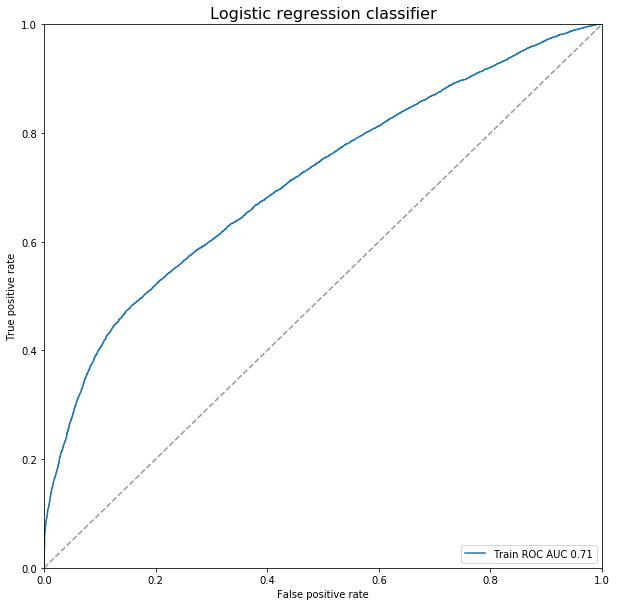

In [67]:
fpr_train, tpr_train, treshholds_train = roc_curve(y_train, y_train_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0,1],[0,1],'--', color=(0.6,0.6,0.6))
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic regression classifier', size=16)
plt.legend(loc='lower right')
plt.show()